In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import bar_chart_race as bcr
from wordcloud import WordCloud
import warnings

## Read in data

In [2]:
df_2016 = pd.read_csv(f'../data/Adam_2016_Top_Songs.csv')
df_2017 = pd.read_csv(f'../data/Adam_2017_Top_Songs.csv')
df_2018 = pd.read_csv(f'../data/Adam_2018_Top_Songs.csv')
df_2019 = pd.read_csv(f'../data/Adam_2019_Top_Songs.csv')
df_2020 = pd.read_csv(f'../data/Adam_2020_Top_Songs.csv')
df_2021 = pd.read_csv(f'../data/Adam_2021_Top_Songs.csv')

In [3]:
brenda_df_2016 = pd.read_csv(f'../data/Brenda_2016_Top_Songs.csv')
brenda_df_2017 = pd.read_csv(f'../data/Brenda_2017_Top_Songs.csv')
brenda_df_2018 = pd.read_csv(f'../data/Brenda_2018_Top_Songs.csv')
brenda_df_2019 = pd.read_csv(f'../data/Brenda_2019_Top_Songs.csv')
brenda_df_2020 = pd.read_csv(f'../data/Brenda_2020_Top_Songs.csv')
brenda_df_2021 = pd.read_csv(f'../data/Brenda_2021_Top_Songs.csv')

## Inspect data

In [4]:
df_2021[['name', 'artist', 'album', 'release_date']].head()

name          artist  \
0                                              Karma         MOD SUN   
1                                          estella//     KennyHoopla   
2  Sick and Tired (ft. Machine Gun Kelly and Trav...       iann dior   
3                                     Lavender Bones  Stand Atlantic   
4                                Hate Me (Sometimes)  Stand Atlantic   

                          album release_date  
0  Internet Killed The Rockstar   2021-02-12  
1                     estella//   2020-11-20  
2                      I'm Gone   2020-06-12  
3                Skinny Dipping   2018-10-26  
4                 Pink Elephant   2020-08-07

In [5]:
df_2021_ = df_2021[['artist', 'name']]\
    .groupby('artist')\
    .count()\
    .sort_values('name', ascending=False)\
    .reset_index()
df_2021_.columns = ['artist', 'count']
df_2021_.head()

artist  count
0        Beach Bunny     12
1          The Beths      8
2            MOD SUN      7
3  Machine Gun Kelly      7
4          iann dior      6

In [6]:
len_artists = len(df_2021[['artist']].groupby('artist').count())
print(f'You had {len_artists} artists in the 100 songs.')

You had 36 artists in the 100 songs.


In [7]:
df_2016_ = df_2016[['artist', 'name']].groupby('artist').count().sort_values('name', ascending=False).reset_index()
df_2016_.columns = ['artist_2016', 'count_2016']
df_2016_.head()

artist_2016  count_2016
0  A Day To Remember          10
1          blink-182           9
2            Seether           8
3   The Story So Far           6
4       Rise Against           5

In [8]:
df_2017_ = df_2017[['artist', 'name']].groupby('artist').count().sort_values('name', ascending=False).reset_index()
df_2017_.columns = ['artist_2017', 'count_2017']
df_2017_.head()

artist_2017  count_2017
0   The Story So Far          10
1       Rise Against           7
2          blink-182           7
3  A Day To Remember           7
4           Paramore           7

In [9]:
df_2018_ = df_2018[['artist', 'name']].groupby('artist').count().sort_values('name', ascending=False).reset_index()
df_2018_.columns = ['artist_2018', 'count_2018']
df_2018_.head()

artist_2018  count_2018
0  Four Year Strong           8
1      State Champs           7
2         zebrahead           6
3  The Story So Far           6
4      Rise Against           6

In [10]:
df_2019_ = df_2019[['artist', 'name']].groupby('artist').count().sort_values('name', ascending=False).reset_index()
df_2019_.columns = ['artist_2019', 'count_2019']
df_2019_.head()

artist_2019  count_2019
0   The Story So Far          30
1       Rise Against          16
2   Four Year Strong           7
3  A Day To Remember           6
4  Angels & Airwaves           5

In [11]:
df_2020_ = df_2020[['artist', 'name']].groupby('artist').count().sort_values('name', ascending=False).reset_index()
df_2020_.columns = ['artist_2020', 'count_2020']
df_2020_.head()

artist_2020  count_2020
0   The Story So Far          15
1  A Day To Remember           8
2       Rise Against           8
3       Knuckle Puck           8
4      Glass Animals           7

In [12]:
df_2021_ = df_2021[['artist', 'name']].groupby('artist').count().sort_values('name', ascending=False).reset_index()
df_2021_.columns = ['artist_2021', 'count_2021']
df_2021_.head()

artist_2021  count_2021
0        Beach Bunny          12
1          The Beths           8
2            MOD SUN           7
3  Machine Gun Kelly           7
4          iann dior           6

In [13]:
df_concat = pd.concat([df_2016_, df_2017_, df_2018_, df_2019_, df_2020_, df_2021_], axis=1)
df_concat.head()

artist_2016  count_2016        artist_2017  count_2017  \
0  A Day To Remember        10.0   The Story So Far          10   
1          blink-182         9.0       Rise Against           7   
2            Seether         8.0          blink-182           7   
3   The Story So Far         6.0  A Day To Remember           7   
4       Rise Against         5.0           Paramore           7   

        artist_2018  count_2018        artist_2019  count_2019  \
0  Four Year Strong         8.0   The Story So Far        30.0   
1      State Champs         7.0       Rise Against        16.0   
2         zebrahead         6.0   Four Year Strong         7.0   
3  The Story So Far         6.0  A Day To Remember         6.0   
4      Rise Against         6.0  Angels & Airwaves         5.0   

         artist_2020  count_2020        artist_2021  count_2021  
0   The Story So Far        15.0        Beach Bunny        12.0  
1  A Day To Remember         8.0          The Beths         8.0  
2       Rise Against         8.0            MOD SUN         7.0  
3       Knuckle Puck         8.0  Machine Gun Kelly         7.0  
4      Glass Animals         7.0          iann dior         6.0

In [14]:
len_artists = len(df_2016[['artist']].groupby('artist').count())
print(f'You had {len_artists} artists in the 100 songs in 2016.')

You had 39 artists in the 100 songs in 2016.


In [15]:
len_artists = len(df_2017[['artist']].groupby('artist').count())
print(f'You had {len_artists} artists in the 100 songs in 2017.')

You had 45 artists in the 100 songs in 2017.


In [16]:
len_artists = len(df_2018[['artist']].groupby('artist').count())
print(f'You had {len_artists} artists in the 100 songs in 2018.')

You had 40 artists in the 100 songs in 2018.


In [17]:
len_artists = len(df_2019[['artist']].groupby('artist').count())
print(f'You had {len_artists} artists in the 100 songs in 2019.')

You had 26 artists in the 100 songs in 2019.


In [18]:
len_artists = len(df_2020[['artist']].groupby('artist').count())
print(f'You had {len_artists} artists in the 100 songs in 2020.')

You had 40 artists in the 100 songs in 2020.


In [19]:
len_artists = len(df_2021[['artist']].groupby('artist').count())
print(f'You had {len_artists} artists in the 100 songs in 2021.')

You had 36 artists in the 100 songs in 2021.


## Data visualization

### Songs per artist per year

In [20]:
plt.rcParams["figure.figsize"] = (24, 12)

In [21]:
for df, year, count in zip(
    [df_2016_, df_2017_, df_2018_, df_2019_, df_2020_, df_2021_],
    ['2016', '2017', '2018', '2019', '2020', '2021'],
    ['count_2016', 'count_2017', 'count_2018', 'count_2019', 'count_2020', 'count_2021']):
    df['artist'] = df.iloc[:,0]
    df['year'] = [year] * len(df)
    df['count'] = df[count]
    df = df[['artist', 'year', 'count']]

bar_chart_race_df = pd.concat([df_2016_, df_2017_, df_2018_, df_2019_, df_2020_, df_2021_], ignore_index=True, axis=0, sort=False)[['artist', 'year', 'count']]

df_bcr = pd.DataFrame(index=['2016', '2017', '2018', '2019', '2020', '2021'])
for artist,year,count in zip(bar_chart_race_df['artist'],bar_chart_race_df['year'],bar_chart_race_df['count']):
    df_bcr.loc[year, artist] = count
df_bcr = df_bcr.fillna(0)

for c in df_bcr.columns:
    df_bcr[c] = df_bcr[c].cumsum()
df_bcr

A Day To Remember  blink-182  Seether  The Story So Far  Rise Against  \
2016               10.0        9.0      8.0               6.0           5.0   
2017               17.0       16.0      9.0              16.0          12.0   
2018               22.0       21.0     10.0              22.0          18.0   
2019               28.0       21.0     10.0              52.0          34.0   
2020               36.0       22.0     10.0              67.0          42.0   
2021               37.0       22.0     10.0              68.0          42.0   

      Nirvana  Hinder  Train  Red Hot Chili Peppers  \
2016      4.0     4.0    3.0                    3.0   
2017      6.0     7.0    6.0                    4.0   
2018      6.0     7.0    6.0                    5.0   
2019      6.0     7.0    6.0                    5.0   
2020      6.0     7.0    6.0                    5.0   
2021      6.0     7.0    6.0                    5.0   

      Tom Petty and the Heartbreakers  ...  The Backseat Lovers  \
2016                              3.0  ...                  0.0   
2017                              5.0  ...                  0.0   
2018                              6.0  ...                  0.0   
2019                              6.0  ...                  0.0   
2020                              6.0  ...                  0.0   
2021                              6.0  ...                  1.0   

      Simple Creatures  Origami Angel  Neck Deep  Movements  Lil Peep  \
2016               0.0            0.0        0.0        0.0       0.0   
2017               0.0            0.0        0.0        0.0       0.0   
2018               0.0            0.0        0.0        0.0       0.0   
2019               0.0            0.0        0.0        0.0       0.0   
2020               0.0            0.0        0.0        0.0       0.0   
2021               1.0            1.0        1.0        1.0       1.0   

      Landon Cube  KennyHoopla  Cavetown  raspy  
2016          0.0          0.0       0.0    0.0  
2017          0.0          0.0       0.0    0.0  
2018          0.0          0.0       0.0    0.0  
2019          0.0          0.0       0.0    0.0  
2020          0.0          0.0       0.0    0.0  
2021          1.0          1.0       1.0    1.0  

[6 rows x 130 columns]

In [22]:
plt.rcParams["figure.figsize"] = (12, 24)

In [23]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    start = time.time()
    bcr.bar_chart_race(df_bcr,
                       filename='../images/video.mp4',
                       figsize=(24,12), #(24,12),
    #                    dpi=120,
                       n_bars=10,
                       fixed_max=False,
                       steps_per_period=100,
                       period_length=5000,
                       period_label={
                        'x': .91,
                        'y': .1,
                        'ha': 'right',
                        'va': 'center',
                        'size': 40},
                       title='My Top Artists Through the Years: Number of songs per artist on 2016-2021 playlists',
                       title_size=34,
                       bar_label_size=30,
                       tick_label_size=30,
                       )
    (time.time() - start) / 60

In [24]:
def get_all_artist_counts(df1,df2,df3,df4,df5,df6):
    
    song_names = list((df1['name']\
                      .append(df2['name'])\
                      .append(df3['name'])\
                      .append(df4['name'])\
                      .append(df5['name'])\
                      .append(df6['name'])))

    artists_names = list((df1['artist']\
                      .append(df2['artist'])\
                      .append(df3['artist'])\
                      .append(df4['artist'])\
                      .append(df5['artist'])\
                      .append(df6['artist'])))
    song_artist_names = list(zip(song_names,artists_names))
   
    artists = list(sorted(set(df1['artist']\
                              .append(df2['artist'])\
                              .append(df3['artist'])\
                              .append(df4['artist'])\
                              .append(df5['artist'])\
                              .append(df6['artist']))))
    plays_2016_ = [0]*len(artists)
    plays_2017_ = [0]*len(artists)
    plays_2018_ = [0]*len(artists)
    plays_2019_ = [0]*len(artists)
    plays_2020_ = [0]*len(artists)
    plays_2021_ = [0]*len(artists)
    for j in range(len(artists)):
        plays_2016, plays_2017, plays_2018, plays_2019, plays_2020, plays_2021 = 0,0,0,0,0,0
        for i in range(len(df1['name'])):
            if artists[j] == df1['artist'][i]:
                plays_2016 += 1
            if artists[j] == df2['artist'][i]:
                plays_2017 += 1
            if artists[j] == df3['artist'][i]:
                plays_2018 += 1
            if artists[j] == df4['artist'][i]:
                plays_2019 += 1
            if artists[j] == df5['artist'][i]:
                plays_2020 += 1
            if artists[j] == df6['artist'][i]:
                plays_2021 += 1
        plays_2016_[j] = plays_2016
        plays_2017_[j] = plays_2017
        plays_2018_[j] = plays_2018
        plays_2019_[j] = plays_2019
        plays_2020_[j] = plays_2020
        plays_2021_[j] = plays_2021
    
    return sorted(list(zip(artists, plays_2016_, plays_2017_, plays_2018_, plays_2019_, plays_2020_, plays_2021_)),
                    key=lambda x: (x[1]+x[2]+x[3]+x[4]+x[5]+x[6]), reverse = False)

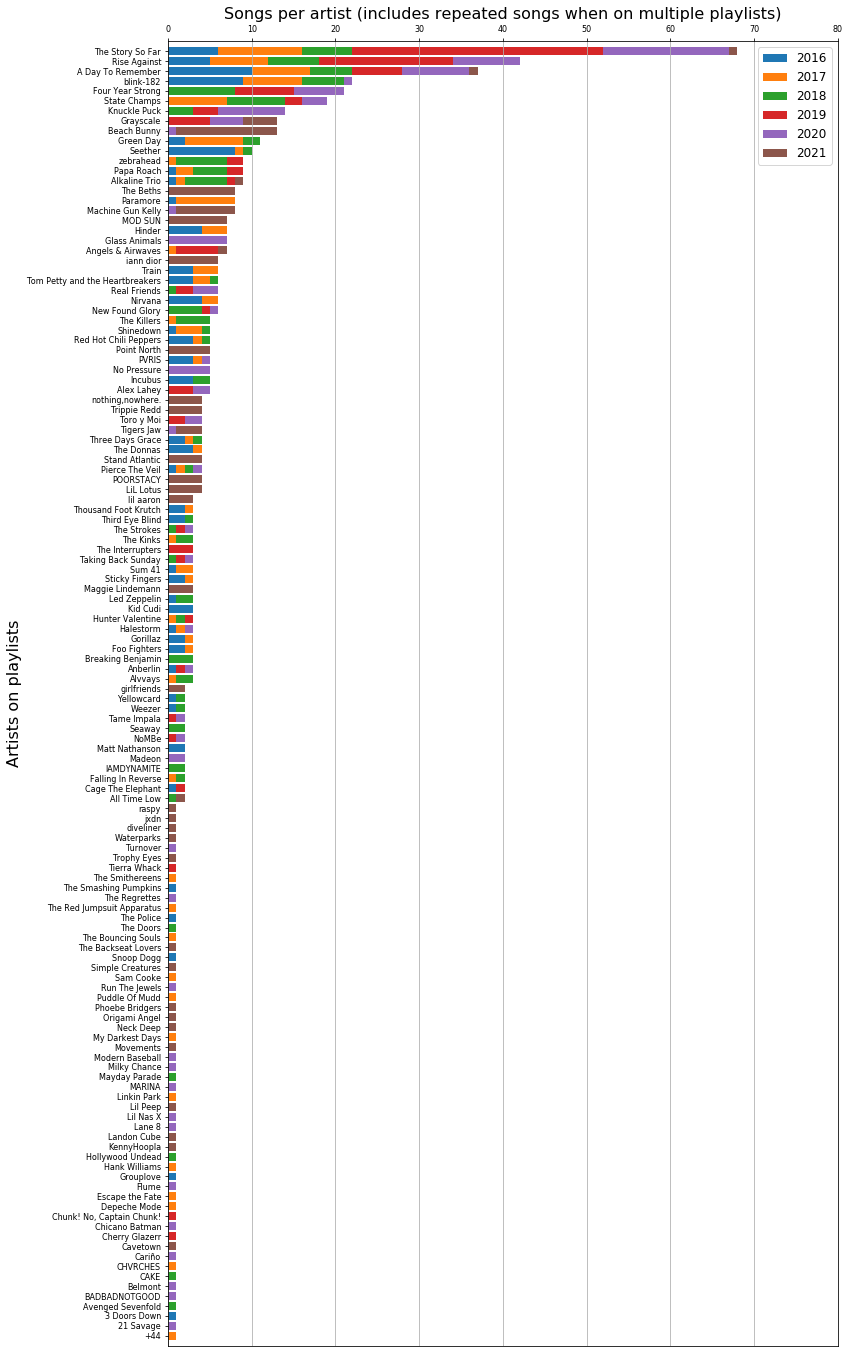

In [25]:
returned = get_all_artist_counts(df_2016,df_2017,df_2018,df_2019,df_2020,df_2021)

def get_vals(returned, j):
    vals = []
    for i in range(len(returned)):
        vals.append(returned[i][j])
    return vals

x = get_vals(returned, 0)

y_2016 = get_vals(returned, 1)
y_2017 = get_vals(returned, 2)
y_2018 = get_vals(returned, 3)
y_2019 = get_vals(returned, 4)
y_2020 = get_vals(returned, 5)
y_2021 = get_vals(returned, 6)

bars = np.add(y_2016, y_2017).tolist()
bars1 = np.add(bars, y_2018).tolist()
bars2 = np.add(bars1, y_2019).tolist()
bars3 = np.add(bars2, y_2020).tolist()

fig, ax = plt.subplots()
ax.xaxis.tick_top()

plt.rcParams["figure.figsize"] = (12, 24)
ax.grid(visible=True, which='major', axis='x')

ax.barh(x, y_2016)
ax.barh(x, y_2017, left=y_2016)
ax.barh(x, y_2018, left=bars)
ax.barh(x, y_2019, left=bars1)
ax.barh(x, y_2020, left=bars2)
ax.barh(x, y_2021, left=bars3)

plt.xticks(size=8, rotation=0)
plt.yticks(size=8, rotation=0)
plt.legend(['2016','2017','2018','2019','2020','2021'], loc='upper right', fontsize='large')

plt.ylabel('Artists on playlists', size=16)
plt.xlim([0,80])
plt.ylim([-1,len(x)])
plt.title('Songs per artist (includes repeated songs when on multiple playlists)', size=16)

# plt.show()
plt.savefig('../images/Adam_song_listen_count.png', bbox_inches='tight')

In [26]:
def get_all_artist_counts_ignore_repeats(df1,df2,df3,df4,df5,df6):
    
    years = [2016]*100 + [2017]*100 + [2018]*100 + [2019]*100 + [2020]*100 + [2021]*100
    song_names = list((df1['name']\
                      .append(df2['name'])\
                      .append(df3['name'])\
                      .append(df4['name'])\
                      .append(df5['name'])\
                      .append(df6['name'])))

    artists_names = list((df1['artist']\
                      .append(df2['artist'])\
                      .append(df3['artist'])\
                      .append(df4['artist'])\
                      .append(df5['artist'])\
                      .append(df6['artist'])))
        
    song_artist_names = sorted(list(zip(song_names,artists_names,years)), key=lambda x: (x[1], x[0], -x[2]))
            
    song_artist_names_ = []
    for i in range(0, len(song_artist_names)-1):
        if str.lower(song_artist_names[i][0]) != str.lower(song_artist_names[i+1][0]):
            song_artist_names_.append((song_artist_names[i][0], song_artist_names[i][1], song_artist_names[i][2]))
        
            
    artists_2016 = []
    artists_2017 = []
    artists_2018 = []
    artists_2019 = []
    artists_2020 = []
    artists_2021 = []
    for i in range(len(song_artist_names_)):
        if song_artist_names_[i][2] == 2016:
            artists_2016.append(song_artist_names_[i][1])
        if song_artist_names_[i][2] == 2017:
            artists_2017.append(song_artist_names_[i][1])
        if song_artist_names_[i][2] == 2018:
            artists_2018.append(song_artist_names_[i][1])
        if song_artist_names_[i][2] == 2019:
            artists_2019.append(song_artist_names_[i][1])
        if song_artist_names_[i][2] == 2020:
            artists_2020.append(song_artist_names_[i][1])
        if song_artist_names_[i][2] == 2021:
            artists_2021.append(song_artist_names_[i][1])
    artists = list(sorted(set(df1['artist']\
                          .append(df2['artist'])\
                          .append(df3['artist'])\
                          .append(df4['artist'])\
                          .append(df5['artist'])\
                          .append(df6['artist']))))
    
    plays_2016_ = [0]*len(artists)
    plays_2017_ = [0]*len(artists)
    plays_2018_ = [0]*len(artists)
    plays_2019_ = [0]*len(artists)
    plays_2020_ = [0]*len(artists)
    plays_2021_ = [0]*len(artists)

    for j in range(len(artists)):
        plays_2016, plays_2017, plays_2018, plays_2019, plays_2020, plays_2021 = 0,0,0,0,0,0
        for i in range(len(artists_2016)):
            if artists[j] == artists_2016[i]:
                plays_2016 += 1
        for i in range(len(artists_2017)):
            if artists[j] == artists_2017[i]:
                plays_2017 += 1
        for i in range(len(artists_2018)):
            if artists[j] == artists_2018[i]:
                plays_2018 += 1
        for i in range(len(artists_2019)):
            if artists[j] == artists_2019[i]:
                plays_2019 += 1
        for i in range(len(artists_2020)):
            if artists[j] == artists_2020[i]:
                plays_2020 += 1
        for i in range(len(artists_2021)):
            if artists[j] == artists_2021[i]:
                plays_2021 += 1
            
        plays_2016_[j] = plays_2016
        plays_2017_[j] = plays_2017
        plays_2018_[j] = plays_2018
        plays_2019_[j] = plays_2019
        plays_2020_[j] = plays_2020
        plays_2021_[j] = plays_2021
    
    return sorted(list(zip(artists, plays_2016_, plays_2017_, plays_2018_, plays_2019_, plays_2020_, plays_2021_)),
                    key=lambda x: (x[1]+x[2]+x[3]+x[4]+x[5]+x[6]), reverse = False)

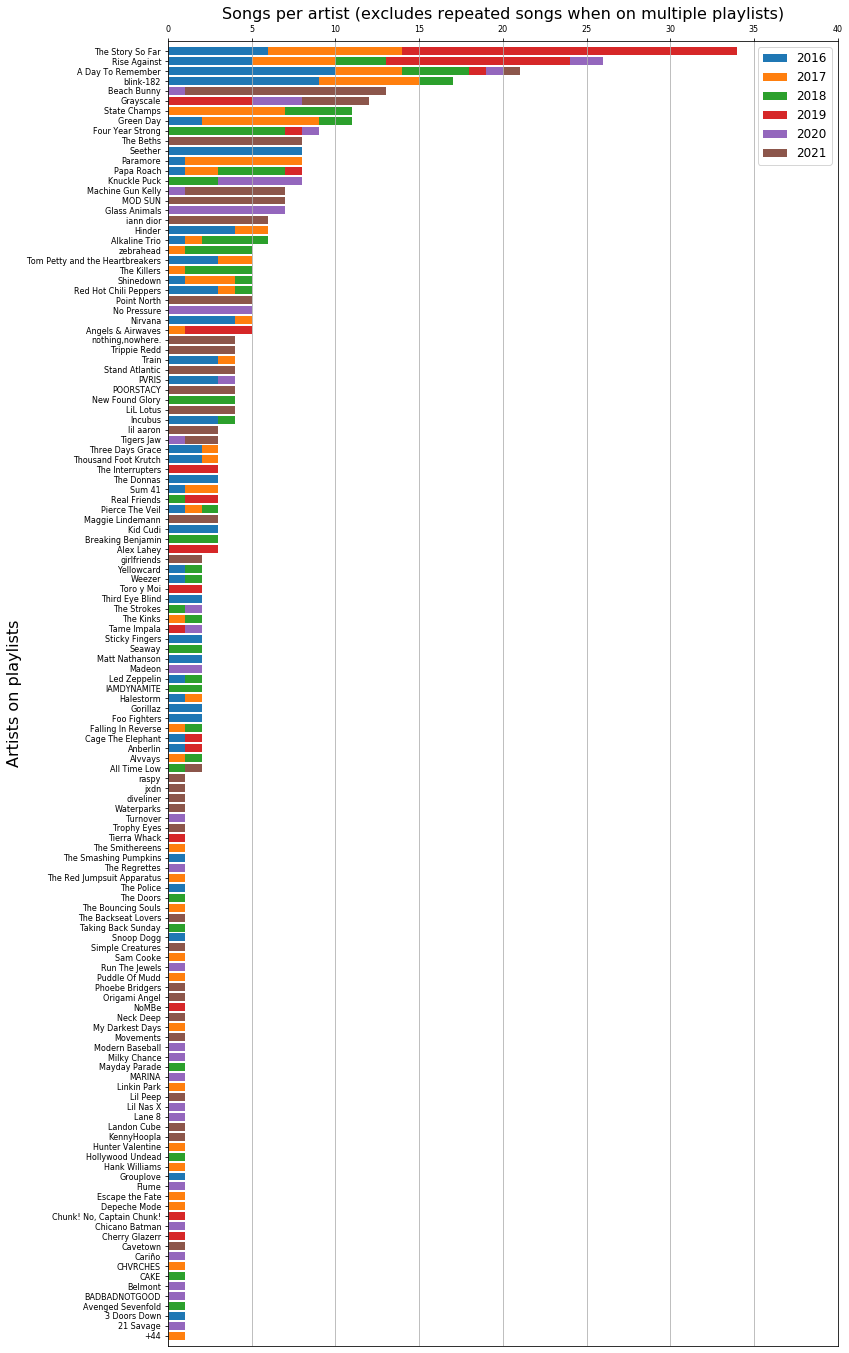

In [27]:
returned = get_all_artist_counts_ignore_repeats(df_2016,df_2017,df_2018,df_2019,df_2020,df_2021)

def get_vals(returned, j):
    vals = []
    for i in range(len(returned)):
        vals.append(returned[i][j])
    return vals

x = get_vals(returned, 0)

y_2016 = get_vals(returned, 1)
y_2017 = get_vals(returned, 2)
y_2018 = get_vals(returned, 3)
y_2019 = get_vals(returned, 4)
y_2020 = get_vals(returned, 5)
y_2021 = get_vals(returned, 6)

bars = np.add(y_2016, y_2017).tolist()
bars1 = np.add(bars, y_2018).tolist()
bars2 = np.add(bars1, y_2019).tolist()
bars3 = np.add(bars2, y_2020).tolist()

fig, ax = plt.subplots()
ax.xaxis.tick_top()

plt.rcParams["figure.figsize"] = (12, 24)
ax.grid(visible=True, which='major', axis='x')

ax.barh(x, y_2016)
ax.barh(x, y_2017, left=y_2016)
ax.barh(x, y_2018, left=bars)
ax.barh(x, y_2019, left=bars1)
ax.barh(x, y_2020, left=bars2)
ax.barh(x, y_2021, left=bars3)

plt.xticks(size=8, rotation=0)
plt.yticks(size=8, rotation=0)
plt.legend(['2016','2017','2018','2019','2020','2021'], loc='upper right', fontsize='large')

plt.ylabel('Artists on playlists', size=16)
plt.xlim([0,40])
plt.ylim([-1,len(x)])
plt.title('Songs per artist (excludes repeated songs when on multiple playlists)', size=16)

# plt.show()
plt.savefig('../images/Adam_song_listen_count_no_repeats.png', bbox_inches='tight')

### Release years

In [28]:
def get_all_years_count(df, start, end):
    years = list(range(start, end+1))
    year_counts = [0]*len(years)
    for i in range(len(years)):
        year = years[i]
        year = str(year)
        year_count = year_counts[i]
        for j in range(len(df['release_year'])):
            if str(df['release_year'][j]) == str(year):
                year_count += 1
        year_counts[i] = year_count
    return years, year_counts

In [29]:
start = 1965
end = 2021

x = get_all_years_count(df_2016, start, end)[0]
y_2016 = get_all_years_count(df_2016, start, end)[1]
y_2017 = get_all_years_count(df_2017, start, end)[1]
y_2018 = get_all_years_count(df_2018, start, end)[1]
y_2019 = get_all_years_count(df_2019, start, end)[1]
y_2020 = get_all_years_count(df_2020, start, end)[1]
y_2021 = get_all_years_count(df_2021, start, end)[1]

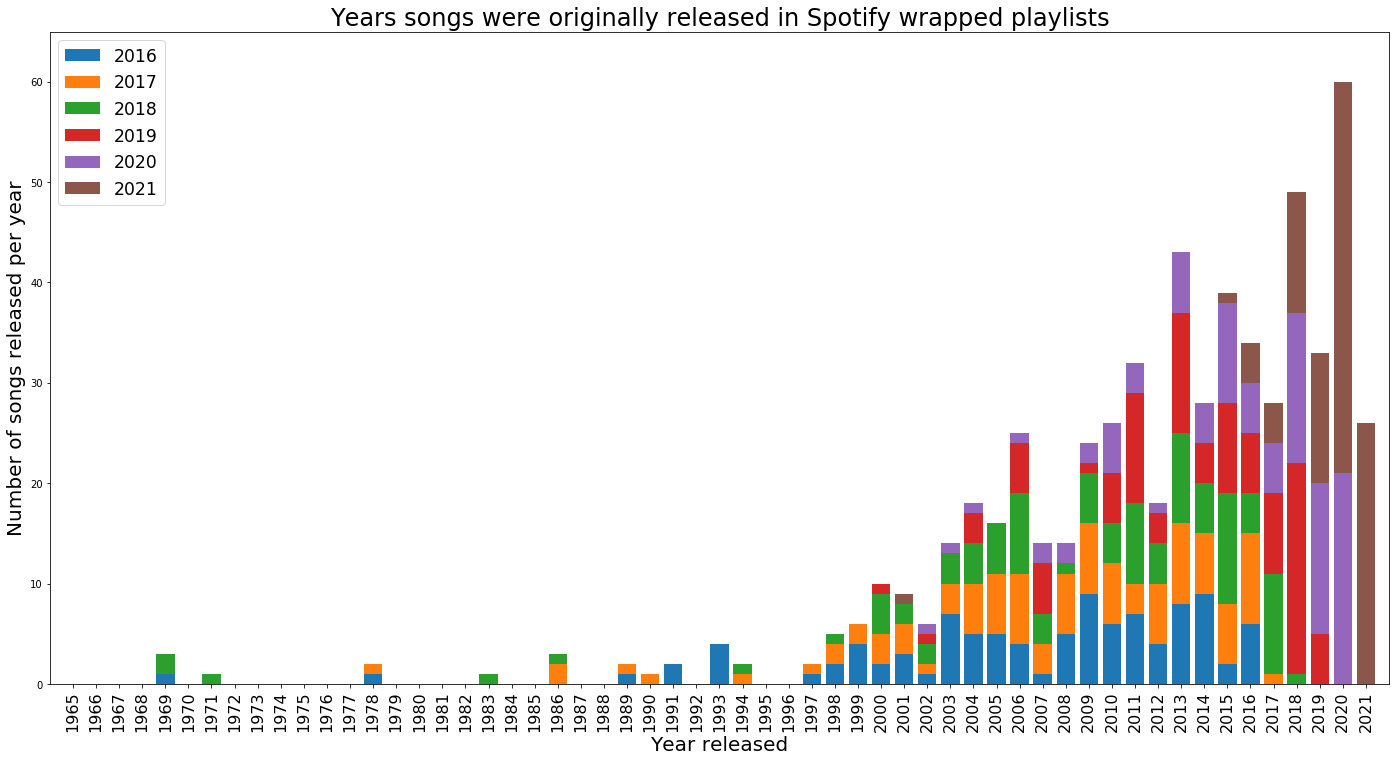

In [30]:
bars = np.add(y_2016, y_2017).tolist()
bars1 = np.add(bars, y_2018).tolist()
bars2 = np.add(bars1, y_2019).tolist()
bars3 = np.add(bars2, y_2020).tolist()

plt.rcParams["figure.figsize"] = (24, 12)

plt.bar(x, y_2016)
plt.bar(x, y_2017, bottom=y_2016)
plt.bar(x, y_2018, bottom=bars)
plt.bar(x, y_2019, bottom=bars1)
plt.bar(x, y_2020, bottom=bars2)
plt.bar(x, y_2021, bottom=bars3)

plt.legend(['2016','2017','2018','2019','2020','2021'], loc='upper left', fontsize='xx-large')

plt.xticks(list(range(start,2022,1)), size=16, rotation=90)
plt.xlabel('Year released', size=20)
plt.xlim([start-1, end+1])
plt.ylabel('Number of songs released per year', size=20)
plt.ylim([0,65])
plt.title('Years songs were originally released in Spotify wrapped playlists', size=24)

# plt.show()
plt.savefig('../images/Adam_song_releases.png', bbox_inches='tight')

### Artist locations

In [31]:
d_2021 = {'Pomfret, MD': [['Landon Cube'], [38.5736, 77.0306]],
          'Dallas, TX': [['LiL Lotus','Maggie Lindemann', 'jxdn'], [32.7767, 96.7970, 32.7767, 96.7970, 32.7767, 96.7970]],
          'Allentown, PA': [['Lil Peep'], [40.6023, 75.4714]],
          'Bloomington, MN': [['MOD SUN'], [44.8408, 93.2983]],
          'Rancho Santa Margarita, CA': [['Movements'], [33.6402, 117.6028]],
          'Wrexham, United Kingdom': [['Neck Deep'], [53.0430, 2.9925]],
          'Washington, D.C.': [['Origami Angel'], [38.9072, 77.0369]],
          'Palm Beach, FL': [['POORSTACY'], [26.7056, 80.0364]],
          'Salt Lake City, UT': [['The Backseat Lovers'], [40.7608, 111.8910]],
          'Auckland, New Zealand': [['The Beths'], [-36.8509, -174.7645]],
          'Canton, OH': [['Trippie Redd'], [40.7989, 81.3784]],
          'Newcastle, Australia': [['Trophy Eyes'], [-32.9283, -151.7817]],
          'Houston, TX': [['Waterparks'], [29.7604, 95.3698]],
          'Arecibo, Puerto Rico': [['iann dior'], [18.4442, 66.6464]],
          'Indianapolis, IN': [['lil aaron'], [39.7684, 86.1581]],
          'Foxborough, MA': [['nothing,nowhere.'], [42.0654, 71.2478]],
          'Pittsburgh, PA': [['raspy'], [40.4406, 79.9959]],
          'Oxford, United Kingdom': [['Cavetown'], [51.7520, 1.2577]],                
          'Cleveland, OH': [['KennyHoopla'], [41.4993, 81.6944]],
          'Los Angeles, CA': [['Phoebe Bridgers', 'Point North', 'Simple Creatures', 'diveliner', 'girlfriends'], [34.0522, 118.2437, 34.0522, 118.2437, 34.0522, 118.2437, 34.0522, 118.2437, 34.0522, 118.2437]],
          'Sydney, Australia': [['Stand Atlantic'], [-33.8688, -151.2093]]}

d_2020 = {'Madrid, Spain': [['Cariño'], [40.4168, 3.7038]],                
          'Oxford, United Kingdom': [['Glass Animals'], [51.7520, 1.2577]],
          'Lithia Springs, GA': [['Lil Nas X'], [33.7940, 84.6605]],
          'Brynmawr, United Kingdom': [['MARINA'], [51.7951, 3.1756]],
          'Houston, Texas': [['Machine Gun Kelly'], [29.7604, 95.3698]],
          'Nantes, France': [['Madeon'], [47.2184, 1.5536]],
          'Kassel, Germany': [['Milky Chance'], [51.3127, -9.4797]],
          'Brooklyn, NY': [['Run The Jewels'], [40.6782, 73.9442]],
          'Scranton, PA': [['Tigers Jaw'], [41.4090, 75.6624]],
          'Virginia Beach, VA': [['Turnover'], [36.8529, 75.9780]],
          'London, United Kingdom': [['21 Savage'], [51.5072, 0.1276]],
          'Toronto, Canada': [['BADBADNOTGOOD'], [43.6532, 79.3832]],         
          'Chicago, IL': [['Beach Bunny', 'Belmont'], [41.8781, 87.6298, 41.8781, 87.6298]],
          'Los Angeles, CA': [['Chicano Batman', 'The Regrettes'], [34.0522, 118.2437, 34.0522, 118.2437]],
          'Sydney, Australia': [['Flume'], [-33.8688, -151.2093]],
          'San Francisco, CA': [['Lane 8'], [37.7749, 122.4194]],
          'Philadelphia, PA': [['Modern Baseball'], [39.9526, 75.1652]],
          'Walnut Creek, CA': [['No Pressure'], [37.9101, 122.0652]]}

d_2019 = {'Melbourne, Australia': [['Alex Lahey'], [-37.8136, -144.9631]],        
          'Paris, France': [['Chunk! No, Captain Chunk!'], [48.8566, -2.3522]],
          'Philadelphia, PA': [['Grayscale', 'Tierra Whack'], [39.9526, 75.1652, 39.9526, 75.1652]],        
          'Heidelberg, Germany': [['NoMBe'], [49.3988, -8.6724]],                
          'Perth, Australia': [['Tame Impala'], [-31.9523, -115.8613]],
          'Columbia, SC': [['Toro y Moi'], [34.0007, 81.0348]],
          'Los Angeles, CA': [['Cherry Glaszerr', 'The Interrupters'], [34.0522, 118.2437, 34.0522, 118.2437]]}

d_2018 = {'Towson, MD': [['All Time Low'], [39.4015, 76.6019]],
          'Huntington Beach, CA': [['Avenged Sevenfold'], [33.6595, 117.9988]],         
          'Wilkes-Barre, PA': [['Breaking Benjamin'], [41.2459, 75.8813]],
          'Sacramento, CA': [['CAKE'], [38.5816, 121.4944]],        
          'Worcester, MA': [['Four Year Strong'], [42.2626, 71.8023]],                
          'Detroit, MI': [['IAMDYNAMITE'], [42.3314, 83.0458]],            
          'Tallahassee, FL': [['Mayday Parade'], [30.4383, 84.2807]],
          'Coral Springs, FL': [['New Found Glory'], [26.2712, 80.2706]],
          'Tinley Park, IL': [['Real Friends'], [41.5731, 87.7933]],
          'Oakville, Canada': [['Seaway'], [43.4675, 79.6877]],
          'Long Island, NY': [['Taking Back Sunday'], [40.7891, 73.13507]],
          'New York, NY': [['The Stroke'], [40.7128, 74.0060]],
          'Los Angeles, CA': [['Hollywood Undead', 'The Doors'], [34.0522, 118.2437, 34.0522, 118.2437]],
          'Chicago, IL': [['Knuckle Puck'], [41.8781, 87.6298]]}

d_2017 = {'Charlottetown, Canada': [['Alvvays'], [46.2382, 63.1311]],
          'San Diego, CA': [['Angels & Airwaves'], [32.7157, 117.1611]],         
          'Glasgow, United Kingdom': [['CHVRCHES'], [55.8642, 4.2518]],
          'Basildon, United Kingdom': [['Depeche Mode'], [51.5761, -0.4887]],        
          'Pahrump, NV': [['Escape the Fate'], [36.2083, 115.9839]],                
          'Las Vegas, NV': [['Falling In Reverse', 'The Killers'], [36.1699, 115.1398, 36.1699, 115.1398]],            
          'Montgomery, Alabama': [['Hank Williams'], [32.3792, 86.3077]],
          'Toronto, Canada': [['Hunter Valentine'], [43.6532, 79.3832]],
          'Agoura Hills, CA': [['Linkin Park'], [34.1533, 118.7617]],
          'Kansas City, MO': [['Puddle Of Mudd'], [39.0997, 94.5786]],
          'Clarksdale, MS': [['Sam Cooke'], [34.2001, 90.5709]],
          'Albany, NY': [['State Champs'], [42.6526, 73.7562]],
          'New Brunswick, NJ': [['The Bouncing Souls'], [40.4862, 74.4518]],
          'Muswell Hill, London, United Kingdom': [['The Kinks'], [51.5912, 0.1443]],
          'Carteret, NJ': [['The Smithereens'], [40.5773, 74.2282]],
          'La Habra, CA': [['zebrahead'], [33.9319, 117.9461]],
          'Los Angeles, CA': [['+44'], [34.0522, 118.2437]],
          'Jacksonville, FL': [['The Red Jumpsuit Apparatus'], [30.3322, 81.6557]],
          'Peterborough, Canada': [['My Darkest Days'], [44.3091, 78.3197]]}

d_2016 = {'Escatawpa, MS': [['3 Doors Down'], [30.4821, 88.5504]],
          'Ocala, FL': [['A Day To Remember'], [29.1872, 82.1401]],
          'Chicago, IL': [['Alkaline Trio', 'Rise Against', 'The Smashing Pumpkins'], [41.8781, 87.6298, 41.8781, 87.6298, 41.8781, 87.6298]],
          'Winter Haven, FL': [['Anberlin'], [28.0222, 81.732]],
          'Bowling Green, KY': [['Cage The Elephant'], [36.9685, 86.4808]],
          'Seattle, WA': [['Foo Fighters'], [47.6062, 122.3321]],
          'London, United Kingdom': [['Gorillaz', 'Led Zeppelin', 'The Police'], [51.5072, 0.1276, 51.5072, 0.1276, 51.5072, 0.1276]],
          'Berkeley, CA': [['Green Day'], [37.8715, 122.2730]],
          'Los Angeles, CA': [['Grouplove', 'Red Hot Chili Peppers', 'Weezer'], [34.0522, 118.2437, 34.0522, 118.2437, 34.0522, 118.2437]],
          'Red Lion, PA': [['Halestorm'], [39.9009, 76.6058]],
          'Oklahoma City, OK': [['Hinder'], [35.4676, 97.5164]],
          'Calabasas, CA': [['Incubus'], [34.1367, 118.6615]],
          'Cleveland, OH': [['Kid Cudi'], [41.4993, 81.6944]],
          'Lexington, MA': [['Matt Nathanson'], [42.4473, 71.2272]],
          'Aberdeen, WA': [['Nirvana'], [46.9754, 123.8157]],
          'Lowell, MA': [['PVRIS'],[42.6334, 71.3162]],
          'Vacaville, CA': [['Papa Roach'], [38.3566, 121.9877]],
          'Franklin, TN': [['Paramore'], [35.9251, 86.8689]],
          'San Diego, CA': [['Pierce The Veil'], [32.7157, 117.1611]],
          'Jacksonville, FL': [['Shinedown', 'Yellowcard'], [30.3322, 81.6557, 30.3322, 81.6557]],
          'Long Beach, CA': [['Snoop Dogg'], [33.7701, 118.1937]],
          'Sydney, Australia': [['Sticky Fingers'], [-33.8688, -151.2093]],
          'Ajax, Canada': [['Sum 41'], [43.8509, 79.0204]],
          'Palo Alto, CA': [['The Donnas'], [37.4419, 122.1430]],
          'Walnut Creek, CA': [['The Story So Far'], [37.9101, 122.0652]],
          'San Francisco, CA': [['Third Eye Blind', 'Train'], [37.7749, 122.4194, 37.7749, 122.4194]],
          'Peterborough, Canada': [['Thousand Foot Krutch'], [44.3091, 78.3197]],
          'Asphodel-Norwood, Canada': [['Three Days Grace'], [44.3823, 77.9799]],
          'Poway, CA': [['blink-182'], [32.9628, 117.0359]],
          'Pretoria, South Africa': [['Seether'], [-25.7479, -28.2293]],
          'Gainesville, FL': [['Tom Petty and the Heartbreakers'],[29.6516, 82.324]]}


def fill_lat_lons(d, year):
    locs = []
    bands = []
    pops = []
    lats = []
    lons = []
    for loc in d.keys():
        pop = 0
        for i in range(len(d[loc][0])):
            pop +=1
            locs.append(loc)
            bands.append(d[loc][0][i])
            pops.append(pop)
        for i in range(len(d[loc][1])):
            if i in [0,2,4,6,8]:
                lats.append(d[loc][1][i])
            if i in [1,3,5,7,9]:
                lons.append(d[loc][1][i])
    df = pd.DataFrame(list(zip(locs, bands, pops)), columns =['location', 'band', 'pop'])
    df['lat'] = lats
    df['long'] = lons
    df1 = df.groupby('location').max()[['lat','long']].reset_index()
    df2 = df.groupby('location').agg(lambda x: ', '.join(x)).reset_index()
    df3 = df.groupby('location').max()['pop'].reset_index()
    df = pd.merge(df2, df3, on='location', how='left')
    df['Artists' + ' ' + str(year)] = df['band'].copy()
    df = pd.merge(df, df1, on='location', how='left')
    df['long'] = -df.long
    df['year'] = [year]*len(df)
    return df

In [32]:
df_2016_map = fill_lat_lons(d_2016, 2016)
# df_2016_map
df_2017_map = fill_lat_lons(d_2017, 2017)
# df_2017_map
df_2018_map = fill_lat_lons(d_2018, 2018)
# df_2018_map
df_2019_map = fill_lat_lons(d_2019, 2019)
# df_2019_map
df_2020_map = fill_lat_lons(d_2020, 2020)
# df_2020_map
df_2021_map = fill_lat_lons(d_2021, 2021)
# df_2021_map

In [33]:
df_merged = pd.merge(df_2016_map, df_2017_map, on=['lat', 'long','location', 'band', 'pop', 'year'], how='outer')
df_merged = pd.merge(df_merged, df_2018_map, on=['lat', 'long','location', 'band', 'pop', 'year'], how='outer')
df_merged = pd.merge(df_merged, df_2019_map, on=['lat', 'long','location', 'band', 'pop', 'year'], how='outer')
df_merged = pd.merge(df_merged, df_2020_map, on=['lat', 'long','location', 'band', 'pop', 'year'], how='outer')
df_merged = pd.merge(df_merged, df_2021_map, on=['lat', 'long','location', 'band', 'pop', 'year'], how='outer')

df_merged = df_merged.replace(np.nan, '')  

df_m = df_merged.copy()
for i in range(len(df_merged['location'])):
    for j in range(i+1, len(df_merged['location'])):
        if df_merged['location'][i] == df_merged['location'][j]:
            year_i = df_merged['year'][i]
            year_j = df_merged['year'][j]
            df_m[f'Artists {year_j}'][i] = df_m[f'Artists {year_j}'][j] 
            
df_merged = df_m

dont_keep_j = []
for i in range(len(df_merged['location'])):
    l = df_merged['location'][i]
    for j in range(i+1, len(df_merged['location'])):
        if df_merged['location'][j] == l:
            dont_keep_j.append(j)

df_merged = df_merged.drop(index=dont_keep_j)
df_merged["Year"] = df_merged["year"].astype(str)
# df_merged

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [34]:
fig = px.scatter_geo(df_merged,
                     lat='lat',
                     lon='long',
#                      size="pop",
                     color='Year',
                     opacity = .75,
                     hover_name="location",
                     hover_data={'Artists 2016': True,
                                 'Artists 2017': True,
                                 'Artists 2018': True,
                                 'Artists 2019': True,
                                 'Artists 2020': True,
                                 'Artists 2021': True,
                                 'pop': False,
                                 'lat': False, 
                                 'long': False,
                                 'Year': False
                            })

fig.update_traces(marker=dict(size=10))
                  
fig.update_layout(
        title = 'Locations of my top artists<br>(Hover for city and artist names)',
        geo_scope = 'world'
    )

fig.write_image("../images/map.png")
plotly.offline.plot(fig, filename='../images/map.html')

fig.show()

### Word cloud

In [35]:
def get_words(df):
    title_words = []
    for i in range(len(df['name'])):
        song_title_words = df.loc[i, 'name'].split()
        for j in range(len(song_title_words)):
            title_words.append(song_title_words[j].lower())
    title_words = ' '.join(title_words)
    return title_words


def make_wordcloud(text, name):
    text = text.lower()
    # lower max_font_size, change the maximum number of word and lighten the background:
    wordcloud = WordCloud(min_font_size=10, max_font_size=40, max_words=300, background_color="white",
                          collocations=False, margin=5,
                          colormap="Dark2").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(name)
    plt.show()

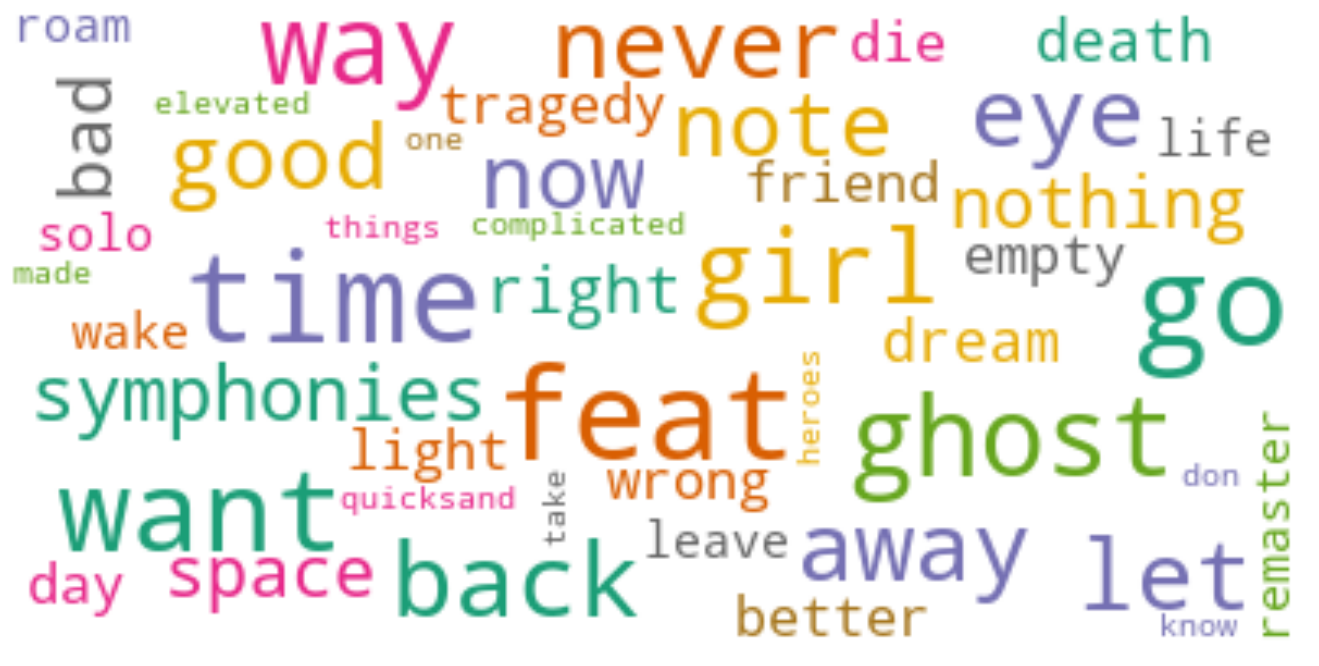

In [36]:
words_2016 = get_words(df_2016)
words_2017 = get_words(df_2017)
words_2018 = get_words(df_2018)
words_2019 = get_words(df_2019)
words_2020 = get_words(df_2020)
words_2021 = get_words(df_2021)

make_wordcloud(words_2016 +\
               words_2017 +\
               words_2018 +\
               words_2019 +\
               words_2020 +\
               words_2021,
               "../images/word_cloud.png")

In [37]:
def search_for_word(word):
    for df, year in zip([df_2016, df_2017, df_2018, df_2019, df_2020, df_2021],
                        ['2016', '2017', '2018', '2019', '2020', '2021']):
        for i in range(len(df['name'])):
            for w in df.loc[i,'name'].lower().split(' '):
                if w == word:
                    print(year)
                    print(df.loc[i,'name'])

In [38]:
word = ''
search_for_word(word)

### Spotify API features

#### Rename Adam's data

In [39]:
adam_df_2016 = df_2016.copy()
adam_df_2017 = df_2017.copy()
adam_df_2018 = df_2018.copy()
adam_df_2019 = df_2019.copy()
adam_df_2020 = df_2020.copy()
adam_df_2021 = df_2021.copy()

In [40]:
def list_song_feature(df, col, list_name):
    df.copy()
    df[col] = [list_name]*100
    return df

In [41]:
adam_dfs = [adam_df_2016, adam_df_2017, adam_df_2018, adam_df_2019, adam_df_2020, adam_df_2021]
list_name = [2016, 2017, 2018, 2019, 2020, 2021]
for df, ln in zip(adam_dfs,list_name):
    df = list_song_feature(df, col='list_name', list_name=f"My Top Songs {ln}")
    df = list_song_feature(df, col='list_name_1', list_name=f"Our Top Songs {ln}\nAdam: Dark, Brenda: Light")

adam_df_concat = pd.concat([adam_df_2016, adam_df_2017, adam_df_2018, adam_df_2019, adam_df_2020, adam_df_2021], ignore_index=True, axis=0)
# adam_df_concat

In [42]:
brenda_dfs = [brenda_df_2016, brenda_df_2017, brenda_df_2018, brenda_df_2019, brenda_df_2020, brenda_df_2021]
list_name = [2016, 2017, 2018, 2019, 2020, 2021]
for df, ln in zip(brenda_dfs,list_name):
    df = list_song_feature(df, col='list_name', list_name=f"My Top Songs {ln}")
    df = list_song_feature(df, col='list_name_1', list_name=f"Our Top Songs {ln}\nAdam: Dark, Brenda: Light")

brenda_df_concat = pd.concat([brenda_df_2016, brenda_df_2017, brenda_df_2018, brenda_df_2019, brenda_df_2020, brenda_df_2021], ignore_index=True, axis=0)
# brenda_df_concat

In [43]:
for df in [adam_df_2016, adam_df_2017, adam_df_2018, adam_df_2019, adam_df_2020, adam_df_2021]:
    df['release_year'] = pd.to_numeric(df['release_year'])
adam_df_concat['release_year'] = pd.to_numeric(adam_df_concat['release_year'])

In [44]:
for df in [brenda_df_2016, brenda_df_2017, brenda_df_2018, brenda_df_2019, brenda_df_2020, brenda_df_2021]:
    df['release_year'] = pd.to_numeric(df['release_year'])
brenda_df_concat['release_year'] = pd.to_numeric(brenda_df_concat['release_year'])

In [45]:
cols = ['acousticness',
        'energy',
        'danceability',
        'valence',
        'liveness',
        'speechiness',
        'instrumentalness',
        'loudness',
        'length',
        'tempo',
        'popularity',
        'mode',
        'key',
        'time_signature',
        'release_year']

In [46]:
def list_song_feature(df, col, list_name):
    df.copy()
    df[col] = [list_name]*100
    return df

In [47]:
# Create function to do linear transformation on variable to change value to [0,1]
def convert_scale(df, col):
    df[col + '_old'] = df[col]
    new_max = 1
    new_min = 0
    new_range = new_max-new_min
    max_val = df[col].max()
    min_val=df[col].min()
    val_range = max_val - min_val
    df[col]=df[col].apply(lambda x: (((x-min_val)*new_range)/val_range)+new_min)
    return

In [48]:
for x in cols:
    convert_scale(adam_df_concat, x)

In [49]:
adam_df_concat = adam_df_concat.sort_values(by=['list_name']+cols, ascending=True)
# adam_df_concat

In [50]:
adam_feature_mean = adam_df_concat.groupby('list_name').mean()[cols]
adam_feature_mean.columns = cols
# adam_feature_mean

In [51]:
for x in cols:
    convert_scale(brenda_df_concat, x)

In [52]:
brenda_df_concat = brenda_df_concat.sort_values(by=['list_name']+cols, ascending=True)
# brenda_df_concat

In [53]:
brenda_feature_mean = brenda_df_concat.groupby('list_name').mean()[cols]
brenda_feature_mean.columns = cols
# brenda_feature_mean

#### Plot

In [54]:
def get_values(list1,list2,list3,list4,list5,list6,
               feature,
               labels,
               multiple=False,
               list7=None,list8=None,list9=None,list10=None,list11=None,list12=None,
               feature2=None):
        
    # Let's look at the list[K-pop] and plot it.
    values1 = feature.loc[list1].tolist()
    values2 = feature.loc[list2].tolist()
    values3 = feature.loc[list3].tolist()
    values4 = feature.loc[list4].tolist()
    values5 = feature.loc[list5].tolist()
    values6 = feature.loc[list6].tolist()
    
    if multiple:
        values7 = feature2.loc[list7].tolist()
        values8 = feature2.loc[list8].tolist()
        values9 = feature2.loc[list9].tolist()
        values10 = feature2.loc[list10].tolist()
        values11 = feature2.loc[list11].tolist()
        values12 = feature2.loc[list12].tolist()
    
    #  Number of variables we're plotting.
    num_vars = len(labels)

    # Split the circle into even parts and save the angles
    # so we know where to put each axis.
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # The plot is a circle, so we need to "complete the loop"
    # and append the start value to the end.
    angles += angles[:1]
    values1 += values1[:1]
    values2 += values2[:1]
    values3 += values3[:1]
    values4 += values4[:1]
    values5 += values5[:1]
    values6 += values6[:1]
    
    if multiple:
        values7 += values1[:1]
        values8 += values2[:1]
        values9 += values3[:1]
        values10 += values4[:1]
        values11 += values5[:1]
        values12 += values6[:1]
        
    if multiple:
        return angles, \
               list1,list2,list3,list4,list5,list6, \
               list7,list8,list9,list10,list11,list12, \
               values1,values2,values3,values4,values5,values6, \
               values7,values8,values9,values10,values11,values12, \
               labels
    else:
        return angles, \
           list1,list2,list3,list4,list5,list6, \
           values1,values2,values3,values4,values5,values6, \
           labels

In [55]:
def plot_radar(angles,
               list1,list2,list3,list4,list5,list6,
               color1,color2,color3,color4,color5,color6,
               values1,values2,values3,values4,values5,values6,
               labels,
               title_y,
               save=False,
               name=False,
               i=False,
               multiple=False,
               color7=None,color8=None,color9=None,color10=None,color11=None,color12=None,
               values7=None,values8=None,values9=None,values10=None,values11=None,values12=None):
    
    fig,([ax1,ax2],[ax3,ax4],[ax5,ax6]) = plt.subplots(3,
                                                       2,
                                                       figsize=(18, 18),
                                                       subplot_kw=dict(polar=True),
                                                       gridspec_kw={'wspace':0,
                                                                    'hspace':.2,
                                                                    'top':1., 
                                                                    'bottom':0.,
                                                                    'left':0., 
                                                                    'right':1.})

    ax1.plot(angles,values1,color=color1, linewidth=1)
    ax1.fill(angles,values1,color=color1, alpha=0.6)
    ax2.plot(angles,values2,color=color2, linewidth=1)
    ax2.fill(angles,values2,color=color2, alpha=0.6)
    ax3.plot(angles,values3,color=color3, linewidth=1)
    ax3.fill(angles,values3,color=color3, alpha=0.6)
    ax4.plot(angles,values4,color=color4, linewidth=1)
    ax4.fill(angles,values4,color=color4, alpha=0.6)
    ax5.plot(angles,values5,color=color5, linewidth=1)
    ax5.fill(angles,values5,color=color5, alpha=0.6)
    ax6.plot(angles,values6,color=color6, linewidth=1)
    ax6.fill(angles,values6,color=color6, alpha=0.6)
    
    if multiple:
        ax1.plot(angles,values7,color=color7, linewidth=1)
        ax1.fill(angles,values7,color=color7, alpha=0.6)
        ax2.plot(angles,values8,color=color8, linewidth=1)
        ax2.fill(angles,values8,color=color8, alpha=0.6)
        ax3.plot(angles,values9,color=color9, linewidth=1)
        ax3.fill(angles,values9,color=color9, alpha=0.6)
        ax4.plot(angles,values10,color=color10, linewidth=1)
        ax4.fill(angles,values10,color=color10, alpha=0.6)
        ax5.plot(angles,values11,color=color11, linewidth=1)
        ax5.fill(angles,values11,color=color11, alpha=0.6)
        ax6.plot(angles,values12,color=color12, linewidth=1)
        ax6.fill(angles,values12,color=color12, alpha=0.6)

    # Fix axis to go in the right order and start at 12 o'clock.
    ax1.set_theta_offset(np.pi / 2)
    ax1.set_theta_direction(-1)
    ax2.set_theta_offset(np.pi / 2)
    ax2.set_theta_direction(-1)
    ax3.set_theta_offset(np.pi / 2)
    ax3.set_theta_direction(-1)
    ax4.set_theta_offset(np.pi / 2)
    ax4.set_theta_direction(-1)
    ax5.set_theta_offset(np.pi / 2)
    ax5.set_theta_direction(-1)
    ax6.set_theta_offset(np.pi / 2)
    ax6.set_theta_direction(-1)

    # Draw axis lines for each angle and label.
    ax1.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax2.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax3.set_thetagrids(np.degrees(angles)[:-1], labels)
    ax4.set_thetagrids(np.degrees(angles)[:-1], labels)
    ax5.set_thetagrids(np.degrees(angles)[:-1], labels)
    ax6.set_thetagrids(np.degrees(angles)[:-1], labels)
    
    # Set title
    ax1.set_title('{} {}'.format('Playlist: ', list1), y=title_y, loc = 'left', fontsize=10)
    ax2.set_title('{} {}'.format('Playlist: ', list2), y=title_y, loc = 'left', fontsize=10)
    ax3.set_title('{} {}'.format('Playlist: ', list3), y=title_y, loc = 'left', fontsize=10)
    ax4.set_title('{} {}'.format('Playlist: ', list4), y=title_y, loc = 'left', fontsize=10)
    ax5.set_title('{} {}'.format('Playlist: ', list5), y=title_y, loc = 'left', fontsize=10)
    ax6.set_title('{} {}'.format('Playlist: ', list6), y=title_y, loc = 'left', fontsize=10)
    
    # You can also set gridlines manually like this:
    ax1.set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax2.set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax3.set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax4.set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax5.set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax6.set_rgrids([0, 0.2, 0.4, 0.6, 0.8, 1])
    
    ax1.set_rlabel_position(40)
    ax2.set_rlabel_position(40)
    ax3.set_rlabel_position(40)
    ax4.set_rlabel_position(40)
    ax5.set_rlabel_position(40)
    ax6.set_rlabel_position(40)

    if save:
        plt.savefig(f'../images/{i}_{name}_draw_radar.png', bbox_inches='tight')
    return

In [56]:
values = get_values(adam_feature_mean.index.values[0],
           adam_feature_mean.index.values[1],
           adam_feature_mean.index.values[2],
           adam_feature_mean.index.values[3],
           adam_feature_mean.index.values[4],
           adam_feature_mean.index.values[5],
           feature=adam_feature_mean,
           labels=cols,
           multiple=False)

angles = values[0]
list1 = values[1]
list2 = values[2]
list3 = values[3]
list4 = values[4]
list5 = values[5]
list6 = values[6]
values1 = values[7]
values2 = values[8]
values3 = values[9]
values4 = values[10]
values5 = values[11]
values6 = values[12]
labels = values[13]

In [57]:
color1,color2,color3,color4,color5,color6 = 'blue', 'orange', 'green', 'red', 'purple', 'brown'

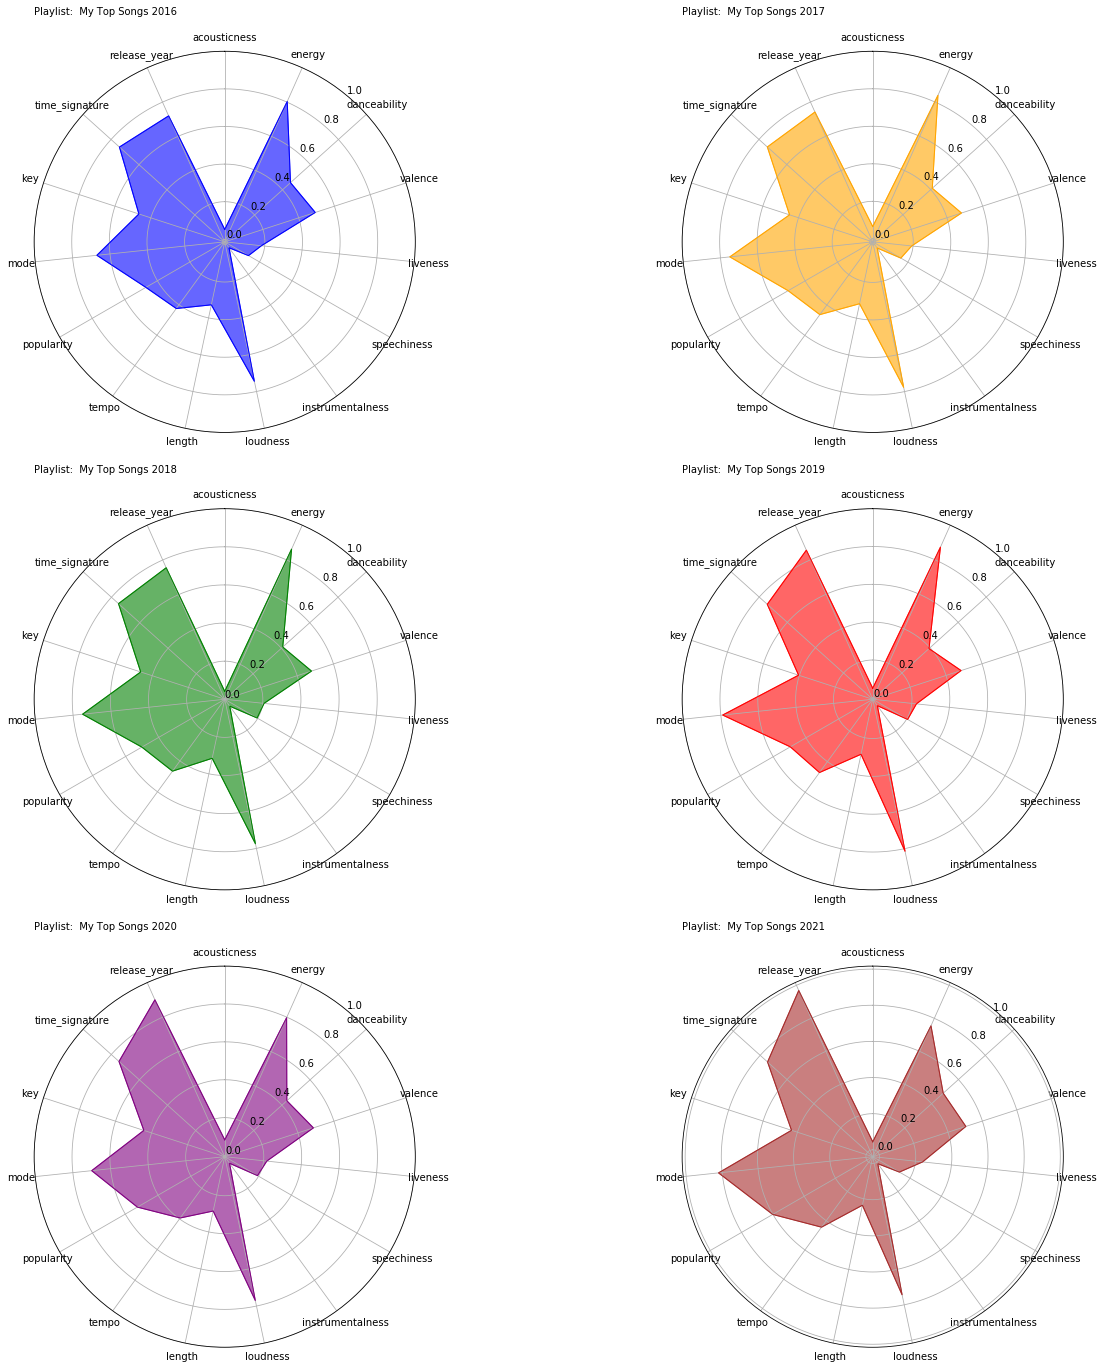

In [58]:
plot_radar(angles,
           list1,list2,list3,list4,list5,list6,
           color1,color2,color3,color4,color5,color6,
           values1,values2,values3,values4,values5,values6,
           labels=cols,
           title_y=1.08,
           multiple=False,
           save=True,
           i='',
           name='Adam')

In [59]:
## Uncomment this cell to plots for individual songs 
## Creates 100 files, each with 6 songs (one from each playlist 2016-2021)


# for i in range(0,100,1):
#     if i % 10 == 0: 
#         print(i)
    
#     feature_j = pd.concat([adam_df_concat.iloc[i,:], adam_df_concat.iloc[i+100,:], adam_df_concat.iloc[i+200,:],
#                                adam_df_concat.iloc[i+300,:], adam_df_concat.iloc[i+400,:], adam_df_concat.iloc[i+500,:]],
#                               ignore_index=True, axis=1).T
    
#     names = feature_j.name.copy()
#     albums = feature_j.album.copy()
#     max_len = 65
#     for j in range(len(feature_j['album'])):
#         if len(str(feature_j['name'][j]) + str(feature_j['album'][j])) > max_len:
#             name_length = len(str(feature_j['name'][j]))
#             album_length = len(str(feature_j['album'][j]))
#             albums[j] = str(feature_j['album'][j])[:(max_len - len(str(feature_j['name'][j])))] + '...'
    
#     feature_j['ind'] = [w + '\n' + x + ' - ' + y + '\n' + z for w,x,y,z in zip(feature_j.list_name,
#                                                                  names,
#                                                                  albums,
#                                                                  feature_j.artist)]

#     feature_j = feature_j.set_index('ind', inplace=False)
#     feature_j = feature_j[cols]

#     values = get_values(feature_j.index.values[0],
#            feature_j.index.values[1],
#            feature_j.index.values[2],
#            feature_j.index.values[3],
#            feature_j.index.values[4],
#            feature_j.index.values[5],
#            feature=feature_j,
#            labels=cols)

#     angles = values[0]
#     list1 = values[1]
#     list2 = values[2]
#     list3 = values[3]
#     list4 = values[4]
#     list5 = values[5]
#     list6 = values[6]
#     values1 = values[7]
#     values2 = values[8]
#     values3 = values[9]
#     values4 = values[10]
#     values5 = values[11]
#     values6 = values[12]
#     labels = values[13]

#     plot_radar(angles,
#                list1,list2,list3,list4,list5,list6,
#                color1,color2,color3,color4,color5,color6,
#                values1,values2,values3,values4,values5,values6,
#                labels=cols,
#                title_y=1.04,
#                multiple=False,
#                save=True,
#                name='Adam',
#                i=i)

In [60]:
adam_feature_mean = adam_df_concat.groupby('list_name_1').mean()[cols]
adam_feature_mean.columns = cols
# adam_feature_mean

In [61]:
brenda_feature_mean = brenda_df_concat.groupby('list_name_1').mean()[cols]
brenda_feature_mean.columns = cols
# brenda_feature_mean

In [62]:
values = get_values(adam_feature_mean.index.values[0],
           adam_feature_mean.index.values[1],
           adam_feature_mean.index.values[2],
           adam_feature_mean.index.values[3],
           adam_feature_mean.index.values[4],
           adam_feature_mean.index.values[5],
           feature=adam_feature_mean,
           labels=cols,
           multiple=True,
           list7=brenda_feature_mean.index.values[0],
           list8=brenda_feature_mean.index.values[1],
           list9=brenda_feature_mean.index.values[2],
           list10=brenda_feature_mean.index.values[3],
           list11=brenda_feature_mean.index.values[4],
           list12=brenda_feature_mean.index.values[5],
           feature2=brenda_feature_mean)

angles = values[0]
list1 = values[1]
list2 = values[2]
list3 = values[3]
list4 = values[4]
list5 = values[5]
list6 = values[6]
list7 = values[7]
list8 = values[8]
list9 = values[9]
list10 = values[10]
list11 = values[11]
list12 = values[12]
values1 = values[13]
values2 = values[14]
values3 = values[15]
values4 = values[16]
values5 = values[17]
values6 = values[18]
values7 = values[19]
values8 = values[20]
values9 = values[21]
values10 = values[21]
values11 = values[22]
values12 = values[23]
labels = values[24]

In [63]:
color1,color2,color3,color4,color5,color6 = 'blue', 'orange', 'green', 'red', 'purple', 'brown'
color7,color8,color9,color10,color11,color12 = 'lightblue', 'bisque', 'lightgreen', 'lightcoral', 'violet', 'tan'

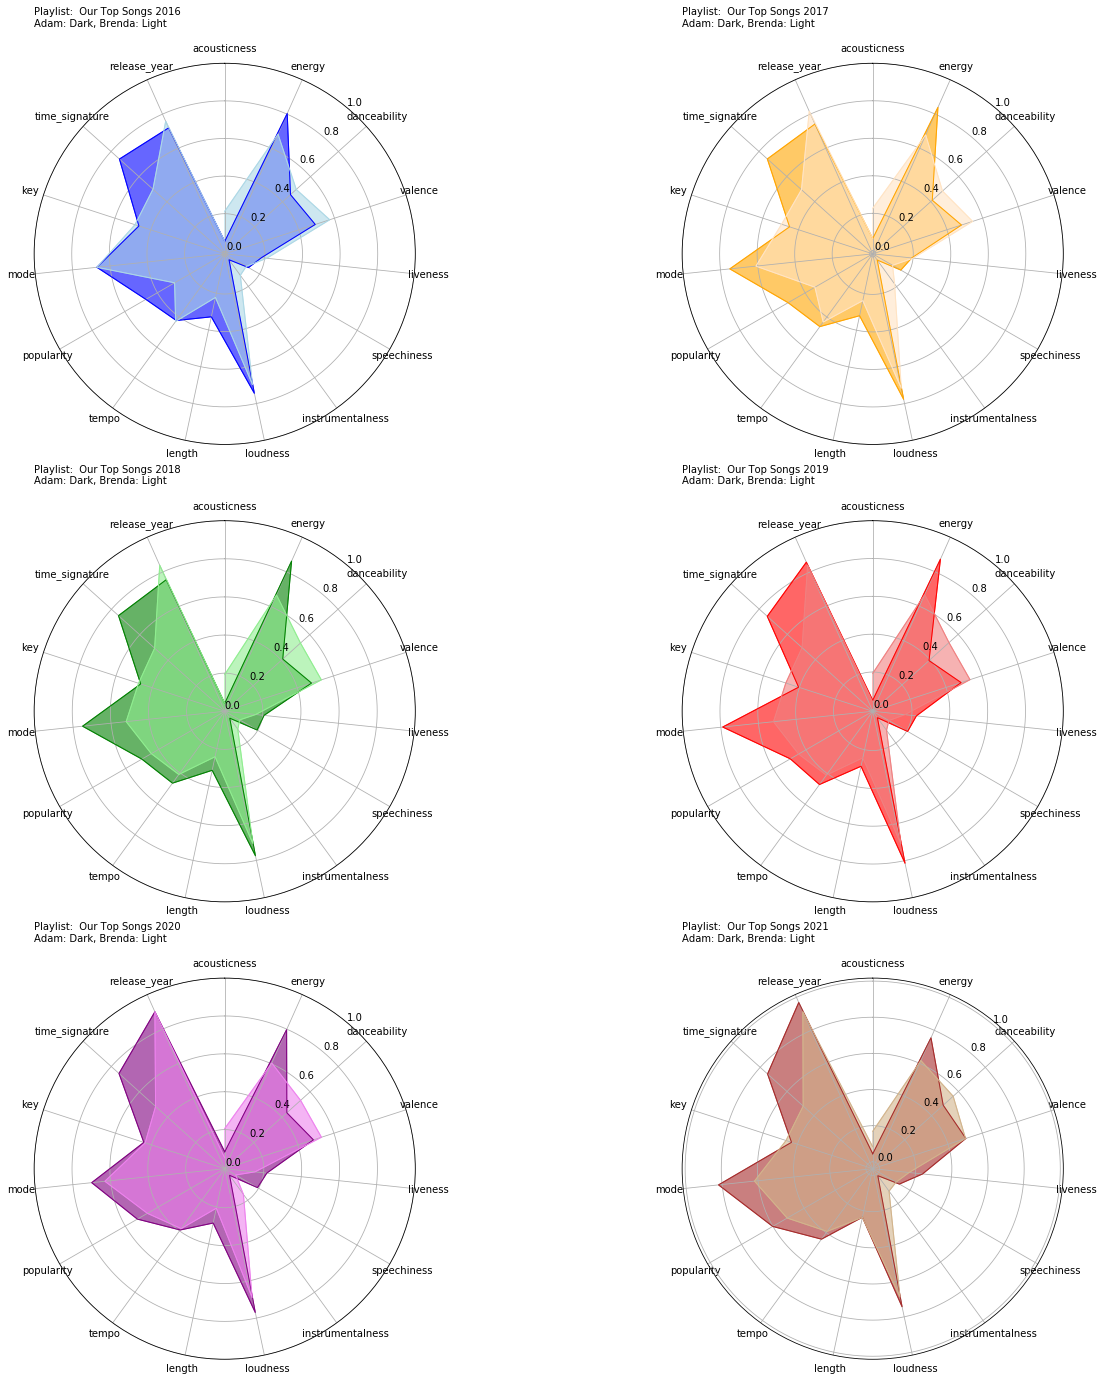

In [64]:
plot_radar(angles,
           list1,list2,list3,list4,list5,list6,
           color1,color2,color3,color4,color5,color6,
           values1,values2,values3,values4,values5,values6,
           labels=cols,
           title_y=1.08,
           multiple=True,
           color7=color7,color8=color8,color9=color9,color10=color10,color11=color11,color12=color12,
           values7=values7,values8=values8,values9=values9,values10=values10,values11=values11,values12=values12,
           save=True,
           i='',
           name='Adam_and_Brenda')